# Tensorflow 2를 활용한 Multi Layer Perceptron 실습
이번 실습에서는 Tensorflow 2를 활용하여 가장 간단한 Neural Network 구조인 MLP(Multi Layer Perceptron)을 직접 생성해 본다.<br>
입문과정용으로 많이 쓰이는 Fashion MNIST dataset을 이용하여 옷의 종류를 구분해보는 Neural Network를 만들어 볼 것이다. <br>
먼저 Tensorflow를 Import한다.

In [1]:
import tensorflow as tf

## Dataset 불러오기
Tensorflow에서는 Fashion MNIST dataset을 불러오기 편하도록 Library에 기본 함수로 지정해 두었다. 아래 명령어를 수행하여 데이터셋을 로드하고, Train/Test set으로 구분해 주자.<br>
Fashion MNIST는 총 10개의 class가 있고, 각 이미지별로 0~9의 Label이 지정되어 있다. 0은 T-shirt/top, 1은 Trouser,..에 해당하고, 이를 식별하기 쉽게 class_names에 저장해 두자.

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

#Load data
###### 아래 빈칸. 실습하면서 완성 #####
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

###### 빈칸 끝 ##### 

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


#Split train set into train/valid set
from sklearn import model_selection

###### 아래 빈칸. 실습하면서 완성 #####
x_train, x_valid , y_train, y_valid = model_selection.train_test_split(x_train, y_train, test_size = 0.2)

###### 빈칸 끝 ##### 


4431872/4422102 [==============================] - 0s 0us/step


데이터를 보고 싶으면 matplotlib를 이용하여 확인할 수 있다.

In [3]:
import matplotlib.pyplot as plt

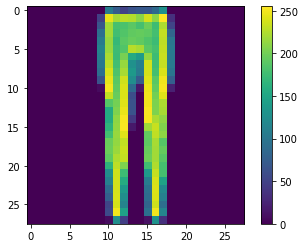

In [6]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()
plt.show()

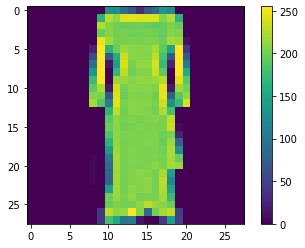

In [4]:
#Let's look at the sample data
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

## Model 구성하기
이제 아주 간단한 Model을 구성해 볼 것이다.
Tensorflow2에서 제공하는 keras의 sequential method를 사용하면 원하는 Layer를 차곡차곡 쌓아가면서 모델을 구성할 수 있다. <br>
아래 그림과 같은 구조로 모델을 구성할 것이다.
![image.png](attachment:image.png)
- 28x28 image를 Input으로 받아서 1차원으로 쭉 편 다음,<br> 
- 128개 Node를 가지는 Hidden layer를 연결하고 Relu activation을 한 번 거친 후에, <br>
- 20%를 랜덤으로 누락시키는 Drop Out를 수행한 뒤 <br>
- 10개의 Node를 갖는 Output으로 연결하고 Softmax를 수행한다.<br>

위와 같은 작업을 수행하기 위해 `tf.keras.layers`를 활용 가능하다. 그중에서도 MLP 구성을 위해서는 아래의 Layer들을 활용할 수 있다.
- `Flatten(input_shape=(x,y,z))`: (x,y,z) 형태의 Input을 받아서 1차원 배열로 바꾸어주는 Layer이다.
- `Dense(N, activation=activation)`: 이전 레이어를 Input으로 하고 N만큼을 Output Node로 갖는 Neural Network를 구성한다. activation을 넣어주면 계산된 값에 Activation을 적용한다.(예: ReLU, Softmax 등)
- `Dropout(p)`: 이전 레이어의 Node의 값을 p만큼의 비율로 0으로 만들어 준다.

In [ ]:
x_train.shape

(48000, 28, 28)

In [7]:
model = tf.keras.models.Sequential([
    ###### 아래 빈칸. 실습하면서 완성 #####
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax'),


    ###### 빈칸 끝 ##### 
])

다음으로 Loss, Optimizer, Metrics등을 정의하여 모델을 컴파일해준다.<br>
- 10개 중 하나로 Classification하는 문제이므로 `SparseCategoricalCrossentropy`를 Loss로 사용해준다. Loss는 `tf.keras.losses` 라이브러리를 사용할 수 있다.
- Optimizer는 가장 널리 쓰이는 방법론 중 하나인 Adam을 사용하자. Optimizer는 `tf.keras.optimizers` 라이브러리를 사용할 수 있다.

In [8]:
###### 아래 빈칸. 실습하면서 완성 #####
# CategoricalCrossentropy : input이 one-hot 인 경우 이용
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()  # label이 int 형태인 경우 이용
optim_fn = tf.keras.optimizers.Adam(learning_rate = 0.001)
###### 빈칸 끝 #####

In [9]:
model.compile(loss=loss_fn, optimizer=optim_fn, metrics=['mae', 'acc'])

In [ ]:
model.compile(optimizer=optim_fn,
              loss=loss_fn,
              metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## 모델 트레이닝
model.fit 명령어를 이용하면 우리가 구성한 모델을 트레이닝할 수 있다.

In [11]:
hist = model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid))

Epoch 1/10
1500/1500 [==============================] - 6s 3ms/step - loss: 2.8425 - mae: 4.4196 - acc: 0.5721 - val_loss: 1.0764 - val_mae: 4.4216 - val_acc: 0.6536
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.9683 - mae: 4.4196 - acc: 0.6459 - val_loss: 0.8169 - val_mae: 4.4216 - val_acc: 0.7057
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.8722 - mae: 4.4196 - acc: 0.6655 - val_loss: 0.7691 - val_mae: 4.4216 - val_acc: 0.7013
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.8448 - mae: 4.4196 - acc: 0.6734 - val_loss: 0.7191 - val_mae: 4.4216 - val_acc: 0.7292
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.8486 - mae: 4.4196 - acc: 0.6755 - val_loss: 0.7043 - val_mae: 4.4216 - val_acc: 0.7374
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.8159 - mae: 4.4196 - acc: 0.6831 - val_loss: 0.7232 - val_mae: 4.4216 - val_acc: 0.7141
Epoc

## 트레이닝 결과 확인
트레이닝이 진행됨에 따라 Loss는 줄어들고 Accuracy는 올라가야 할 것이고,<br>
이런 트렌드가 관찰되지 않는다면 무언가 잘못되었다고 볼 수 있다. <br>
그래프를 그려서 실제로 이런 트렌드가 관찰되는지 확인해 보자.

In [ ]:
hist.history

{'accuracy': [0.5845208168029785,
  0.6316458582878113,
  0.6342708468437195,
  0.6495833396911621,
  0.6645208597183228,
  0.6690416932106018,
  0.6797500252723694,
  0.6839166879653931,
  0.6909166574478149,
  0.6947708129882812],
 'loss': [2.8329455852508545,
  0.9990082383155823,
  0.9492359161376953,
  0.9208360910415649,
  0.8723407983779907,
  0.8439767956733704,
  0.8191383481025696,
  0.8071497678756714,
  0.7859196066856384,
  0.775490939617157],
 'val_accuracy': [0.6893333196640015,
  0.6480833292007446,
  0.6946666836738586,
  0.7109166383743286,
  0.722000002861023,
  0.7271666526794434,
  0.7255833148956299,
  0.7325833439826965,
  0.734083354473114,
  0.7315000295639038],
 'val_loss': [0.9045543074607849,
  0.8642373085021973,
  0.8067511320114136,
  0.7504835724830627,
  0.703661322593689,
  0.6952145099639893,
  0.6856406927108765,
  0.6929656863212585,
  0.6584400534629822,
  0.696868896484375]}

37분

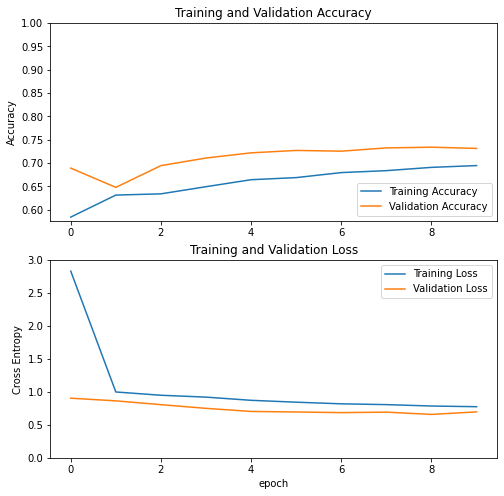

In [ ]:
# Get Training accuray & Validation accuracy from history
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

# Get Training loss & Validation loss from history
loss = hist.history['loss']
val_loss = hist.history['val_loss']

# Let's visualize accuracy
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

# Let's visualize loss
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,3.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

`model.evaluate` 함수를 통해 Test set에 대해서도 Accuracy가 잘 나오는지 확인해 보자.

In [ ]:
model.evaluate(x_test, y_test, verbose=2)

10000/10000 - 1s - loss: 1.6571 - accuracy: 0.8047


[1.6570690578460694, 0.8047]

In [ ]:
predictions = model.predict(x_test)

Test set에서 하나의 샘플을 추출하여 정답과 예측 결과를 비교해 볼 수도 있다.

In [ ]:
import numpy as np
#Plot image with label
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
#Plot 
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='gray')
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    _ = plt.xticks(range(10), class_names, rotation=45)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

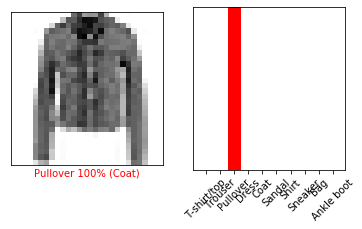

In [ ]:
i = 10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions, y_test)
plt.show()

# 과제: CIFAR10 데이터셋을 이용하여 MLP 모델 만들고 훈련시키기
다른 데이터셋을 이용하여 스스로 MLP를 구성하고 훈련해 보자. <br>
10개의 서로 다른 class를 가진 CIFAR10 데이터셋을 이용하여 비슷하게 MLP 모델을 만들고 훈련하여 제출하시오. <br>
모델은 최소한 3개 이상의 Dense layer를 사용하여 구성하여야 하고 0.4 이상의 Validation accuracy를 달성할 때까지 훈련을 진행하시오. 또한 Regularizer를 한번 이상 활용하시오.(Dropout 제외) <br>
*주의*: Fashion MNIST와 CIFAR10은 Input의 shape가 다르므로 이를 잘 고려해야 한다.

HW1_학번_이름.ipynb 형태로 저장하여 Jupyter Notebook을 그대로 제출! <br>
(예: HW1_2020_12345_keondo.ipynb) <br>
훈련을 진행하고 Output을 지우지 말고 제출할 것!

In [ ]:
cifar10 = tf.keras.datasets.cifar10

#Load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#Split train set into train/valid set
from sklearn import model_selection
x_train, x_valid, y_train, y_valid = model_selection.train_test_split(x_train, y_train,test_size=0.2)

#Rescale data to be in the range of [0,1]
x_train, x_valid, x_test = x_train / 255.0, x_valid / 255.0, x_test / 255.0
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

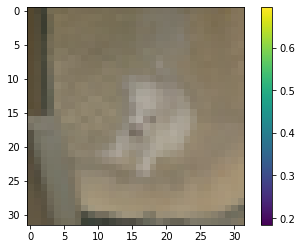

In [ ]:
#Let's look at the sample data
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

---
여기부터 수강생의 코드를 추가하시오